In [1]:
#Import the necessary libraries before we start backtesting
import pandas as pd
import matplotlib.pyplot as plt
import openpyxl
import seaborn as sns
import datetime as dt
import pandas_datareader as web
import yfinance as yahoofinance
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
#Get last year data for both pairs
stock_1 = "AAP"
stock_2 = "ABT"
df = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')

In [3]:
#Get last year data for both pairs
stock_1 = "ADP"
stock_2 = "AJG"

df = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
pair_1 = yahoofinance.download(stock_1,sep=',',start="2022-08-01",end="2022-08-26", index_col='Date', interval="60m", parse_dates=['Date'], date_parser=df).fillna(0)
ticker_1 = yahoofinance.Ticker(stock_1)

pair_2 = yahoofinance.download(stock_2,sep=',',start="2022-08-01",end="2022-08-26", index_col='Date', interval="60m", parse_dates=['Date'], date_parser=df).fillna(0)
ticker_2 = yahoofinance.Ticker(stock_2)

pair_1.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2022-08-01 09:30:00-04:00,240.110001,242.169998,239.559998,240.660004,240.660004,169773
2022-08-01 10:30:00-04:00,240.729996,242.505005,240.729996,242.068207,242.068207,109313
2022-08-01 11:30:00-04:00,241.990005,242.339996,241.080002,241.520004,241.520004,74605
2022-08-01 12:30:00-04:00,241.570007,242.509995,241.429993,241.429993,241.429993,106289
2022-08-01 13:30:00-04:00,241.479996,241.559998,240.539993,240.649994,240.649994,83639


In [148]:
pair_1_a = yahoofinance.download(stock_1,sep=',',start="2020-01-01",end="2021-01-01", index_col='Date', parse_dates=['Date'], date_parser=df).fillna(0)
ticker_1_a = yahoofinance.Ticker(stock_1)

pair_2_b = yahoofinance.download(stock_2,sep=',',start="2020-01-01",end="2021-01-01", index_col='Date', parse_dates=['Date'], date_parser=df).fillna(0)
ticker_2_b = yahoofinance.Ticker(stock_2)

pair_2_b.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,95.610001,95.860001,94.620003,95.510002,92.055984,724500
2020-01-03,94.500000,95.519997,94.290001,95.309998,91.863213,678200
2020-01-06,95.050003,95.750000,94.529999,95.750000,92.287292,1024700
2020-01-07,95.559998,95.750000,94.660004,94.720001,91.294556,627500
2020-01-08,94.750000,95.779999,94.699997,94.849998,91.419838,795700


In [4]:
pair_1.to_csv(f"Data.csv")
pair_2.to_csv(f"Data_2.csv")

In [178]:
pair_1 = pd.read_csv("Data.csv")
pair_1.set_index('Date', inplace=True)
pair_1.dropna(inplace=True)
print(pair_1)

                 Open        High         Low       Close   Adj Close  Volume
Date                                                                         
1/1/2015   240.110001  242.169998  239.559998  240.660004  240.660004  169773
1/2/2015   240.729996  242.505005  240.729996  242.068207  242.068207  109313
1/3/2015   241.990005  242.339996  241.080002  241.520004  241.520004   74605
1/4/2015   241.570007  242.509995  241.429993  241.429993  241.429993  106289
1/5/2015   241.479996  241.559998  240.539993  240.649994  240.649994   83639
...               ...         ...         ...         ...         ...     ...
5/9/2015   256.510010  256.649994  255.949997  256.250000  256.250000   73101
5/10/2015  256.230011  256.630005  255.750000  256.579987  256.579987   72444
5/11/2015  256.679993  257.250000  256.540008  257.070007  257.070007   67095
5/12/2015  257.059998  257.399994  256.722900  257.329987  257.329987   96696
5/13/2015  257.209992  258.359985  256.855011  258.220001  258.2

In [179]:
pair_2 = pd.read_csv("Data_2.csv")
pair_2.set_index('Date', inplace=True)
pair_2.dropna(inplace=True)
print(pair_2)

                 Open        High         Low       Close   Adj Close  Volume
Date                                                                         
1/1/2015   176.789993  177.759995  176.229996  177.024994  177.024994  191429
1/2/2015   177.119995  177.910004  176.580002  177.490005  177.490005   82227
1/3/2015   177.330002  177.330002  175.119995  175.250000  175.250000   75022
1/4/2015   175.229996  175.699997  174.250000  174.279999  174.279999   77913
1/5/2015   174.179993  174.250000  173.009995  173.080002  173.080002   91065
...               ...         ...         ...         ...         ...     ...
5/9/2015   189.330002  189.649994  188.750000  188.960007  188.960007   82688
5/10/2015  188.929993  189.000000  188.574997  188.830002  188.830002   51106
5/11/2015  188.835007  189.830002  188.710007  189.729996  189.729996  131625
5/12/2015  189.735001  190.600006  189.710007  190.600006  190.600006  161020
5/13/2015  190.600006  191.149994  190.380005  191.119995  191.1

In [180]:
pair_1_aa = yahoofinance.download(stock_1,sep=',',start="2019-01-01",end="2020-01-01", index_col='Date', parse_dates=['Date'], date_parser=df).fillna(0)
ticker_1_aa = yahoofinance.Ticker(stock_1)

pair_2_bb = yahoofinance.download(stock_2,sep=',',start="2019-01-01",end="2020-01-01", index_col='Date', parse_dates=['Date'], date_parser=df).fillna(0)
ticker_2_bb = yahoofinance.Ticker(stock_2)

pair_1_aa.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,129.160004,130.779999,128.610001,130.139999,120.988373,2190100
2019-01-03,128.509995,129.300003,126.059998,126.209999,117.334740,3854000
2019-01-04,128.389999,131.389999,127.540001,131.240005,122.011055,2161300
2019-01-07,130.990005,132.149994,129.500000,130.529999,121.350945,3455800
2019-01-08,131.479996,132.429993,129.059998,131.300003,122.066803,2275600


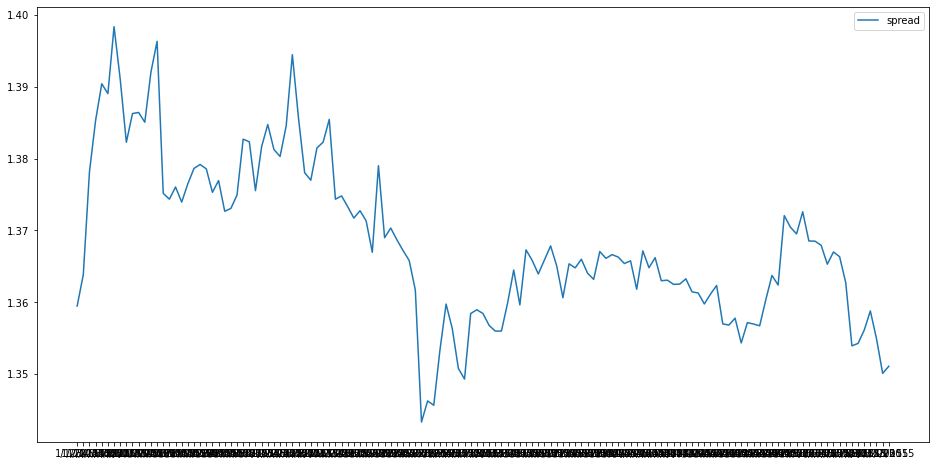

In [181]:
#To figure out if both stocks are cointegrated, calculate the spread between both stocks
spread = pair_1.Close / pair_2.Close
spread_2 = pair_1_a. Close / pair_2_b.Close
spread_3 = pair_1_aa.Close / pair_2_bb.Close

plt.figure(figsize=(16,8))
plt.plot(spread, label="spread")
plt.legend()

In [182]:
#Performing the augmented dickey fuller test to check if both stocks are cointegrated
#First Value is the Test Statistics
#Second Value is the p-value
#If the p-value is below 0.05 or 5%, we can reject the nullhypotesis and say our data is stationary.

adfuller(spread)

(-1.7794410207302398,
 0.39071536138918783,
 2,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 -947.9861248504747)

In [183]:
#Performing the augmented dickey fuller test to check if both stocks are cointegrated
#First Value is the Test Statistics
#Second Value is the p-value
#If the p-value is below 0.05 or 5%, we can reject the nullhypotesis and say our data is stationary.
#This time is 2 years ago

adfuller(spread_2)

(-1.8589227348779516,
 0.3516248763227382,
 0,
 252,
 {'1%': -3.4565688966099373,
  '5%': -2.8730786194395455,
  '10%': -2.5729189953388762},
 -975.7822377834641)

In [184]:
#Performing the augmented dickey fuller test to check if both stocks are cointegrated
#First Value is the Test Statistics
#Second Value is the p-value
#If the p-value is below 0.05 or 5%, we can reject the nullhypotesis and say our data is stationary.
#This time is 3 years ago 

adfuller(spread_3)

(-1.9182040871555748,
 0.32354638657181656,
 0,
 251,
 {'1%': -3.4566744514553016,
  '5%': -2.8731248767783426,
  '10%': -2.5729436702592023},
 -1213.6614765076774)

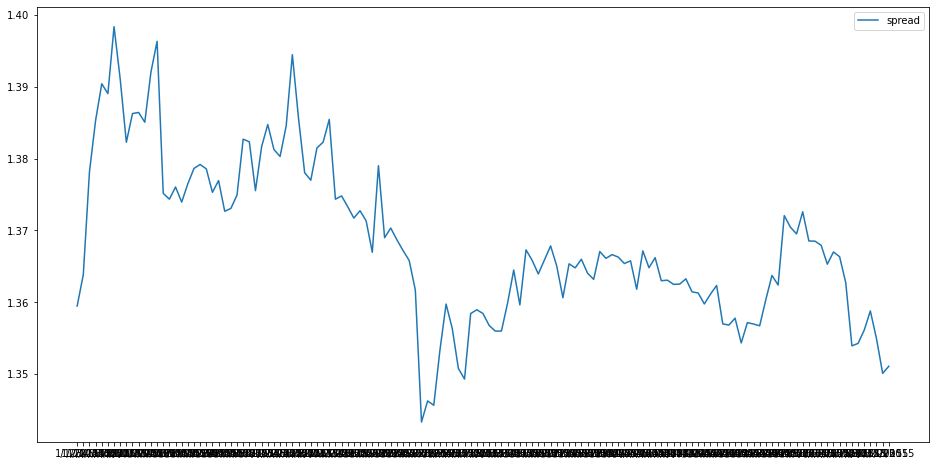

In [185]:
plt.figure(figsize=(16,8))
plt.plot(spread, label="spread")
plt.legend()

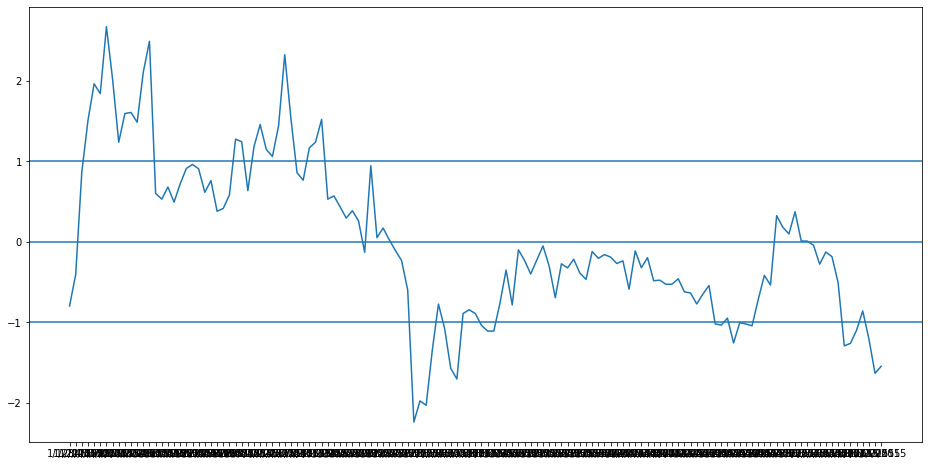

In [186]:
#Calculate the zscore for the spread
spread_mean = spread.mean()
spread_std = spread.std()
zscore = (spread - spread_mean)/spread_std

plt.figure(figsize=(16,8))
plt.plot(zscore)
plt.axhline(-1)
plt.axhline(0)
plt.axhline(1)

In [187]:
#Calculate the zscore for both pairs
pair_1_mean = pair_1.Close.mean()
pair_1_stdev = pair_1.Close.std()
pair_1_zscore = (pair_1.Close - pair_1_mean)/pair_1_stdev

pair_2_mean = pair_2.Close.mean()
pair_2_stdev = pair_2.Close.std()
pair_2_zscore = (pair_2.Close - pair_2_mean)/pair_2_stdev

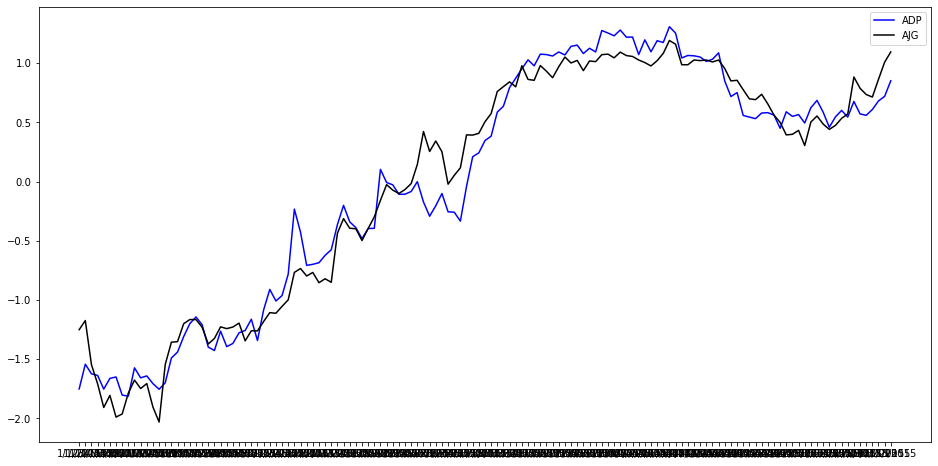

In [188]:
#Combine both zscore pairs
plt.figure(figsize=(16,8))
plt.plot(pair_1_zscore, color="blue", label=stock_1)
plt.plot(pair_2_zscore, color="black", label=stock_2)
plt.legend()
plt.show()

In [189]:
#Now we create a buy/sell trading startegy based on the market inefficientcy
Buy, Sell = [], []

for i in range(2,len(pair_1.Close)):
    if zscore[i] <= -1 and pair_1_zscore[i] <= -1:
        Buy.append(i)
    elif zscore[i] >= 1 and pair_1_zscore[i] >= 1:
        Sell.append(i)

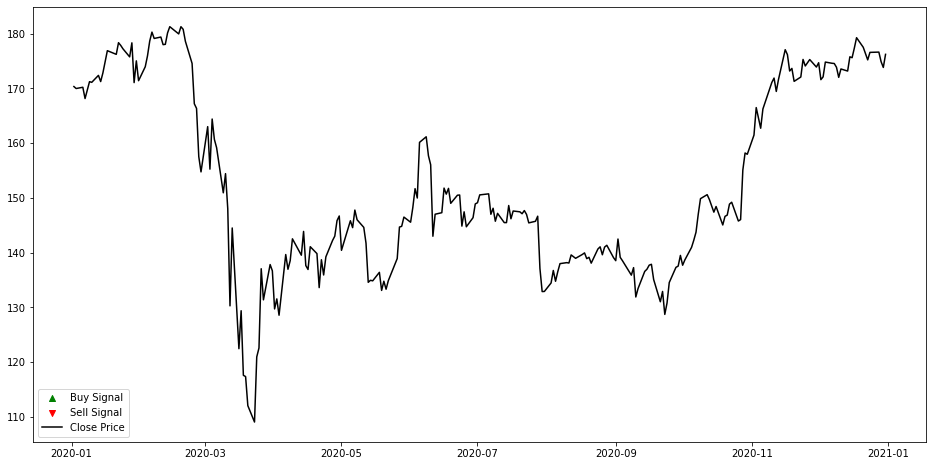

In [190]:
#Now we plot one pair at a time with the signals it gave us.
plt.figure(figsize=(16,8))
plt.scatter(pair_1_a.iloc[Buy].index, pair_1_a.Close.iloc[Buy], marker='^', color='green', label='Buy Signal')
plt.scatter(pair_1_a.iloc[Sell].index, pair_1_a.Close.iloc[Sell], marker='v', color='red', label='Sell Signal')
plt.plot(pair_1_a.Close, label='Close Price', color='black')
plt.legend()
plt.show()

In [191]:
#Now we create a buy/sell trading startegy based on the market inefficientcy
Buy_2, Sell_2 = [], []

for i in range(2,len(pair_2.Close)):
    if zscore[i] >= 1 and pair_1_zscore[i] <= -1:
        Buy_2.append(i)
    elif zscore[i] <= -1 and pair_1_zscore[i] >= -1:
        Sell_2.append(i)

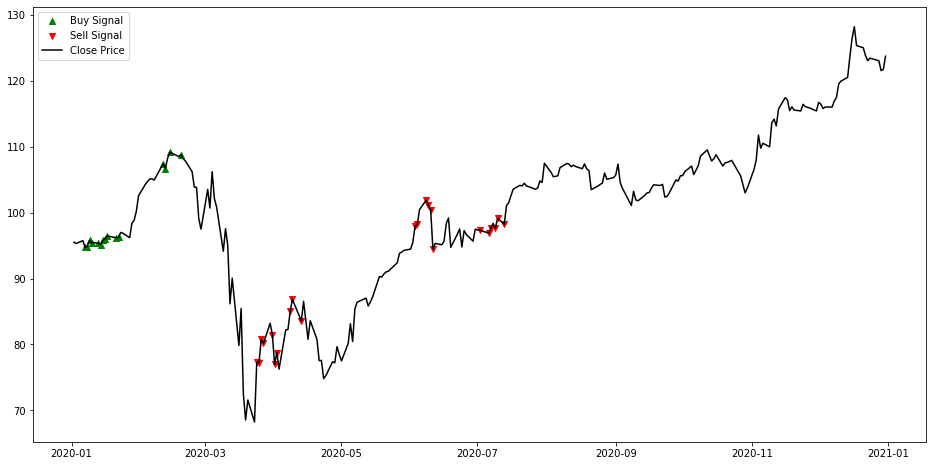

In [192]:
#Now we plot one pair at a time with the signals it gave us.
plt.figure(figsize=(16,8))
plt.scatter(pair_2_b.iloc[Buy_2].index, pair_2_b.Close.iloc[Buy_2], marker='^', color='green', label='Buy Signal')
plt.scatter(pair_2_b.iloc[Sell_2].index, pair_2_b.Close.iloc[Sell_2], marker='v', color='red', label='Sell Signal')
plt.plot(pair_2_b.Close, label='Close Price', color='black')
plt.legend()
plt.show()

In [ ]:
#Now we decompose the data to find any patterns or correlation
result = seasonal_decompose(pair_1.Close, model='multiplicative', period=30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)

<Figure size 432x288 with 0 Axes>

In [ ]:
result_2 = seasonal_decompose(pair_2.Close, model='multiplicative', period=30)
fig = plt.figure()  
fig = result_2.plot()  
fig.set_size_inches(16, 9)